### ASTR 8070: Astrostatistics
***S. R. Taylor***
___

# Homework 7
### Due: Saturday, Mar 29th at 11.59pm CT
---

This is a regression problem. Many of the parts require minor variations of code to switch to new techniques, but otherwise using a similar workflow. 

Note of warning: the data I have provided have associated uncertainties, `yerr`. `sklearn` and `astroML` have different formats for using uncertainties; in `sklearn` fitting you can provide `sample_weight=1/yerr**2`, while in `astroML` fitting you can directly provide `y_error=yerr`.

1. Read in `hw7_data_1.npy`. The dataset should consist of $500$ samples. The first two columns are the two data features, `X`. The third column is the target labels, `y`, and the final column are the heteroscedastic uncertainties on the labels, `yerr`. Make a 2-panel scatter plot of the labels versus each feature.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format='retina'

In [2]:
data = np.load("hw7_data_1.npy")
X = data[:,0:2]
y = data[:,2]
yerr = data[:,3]

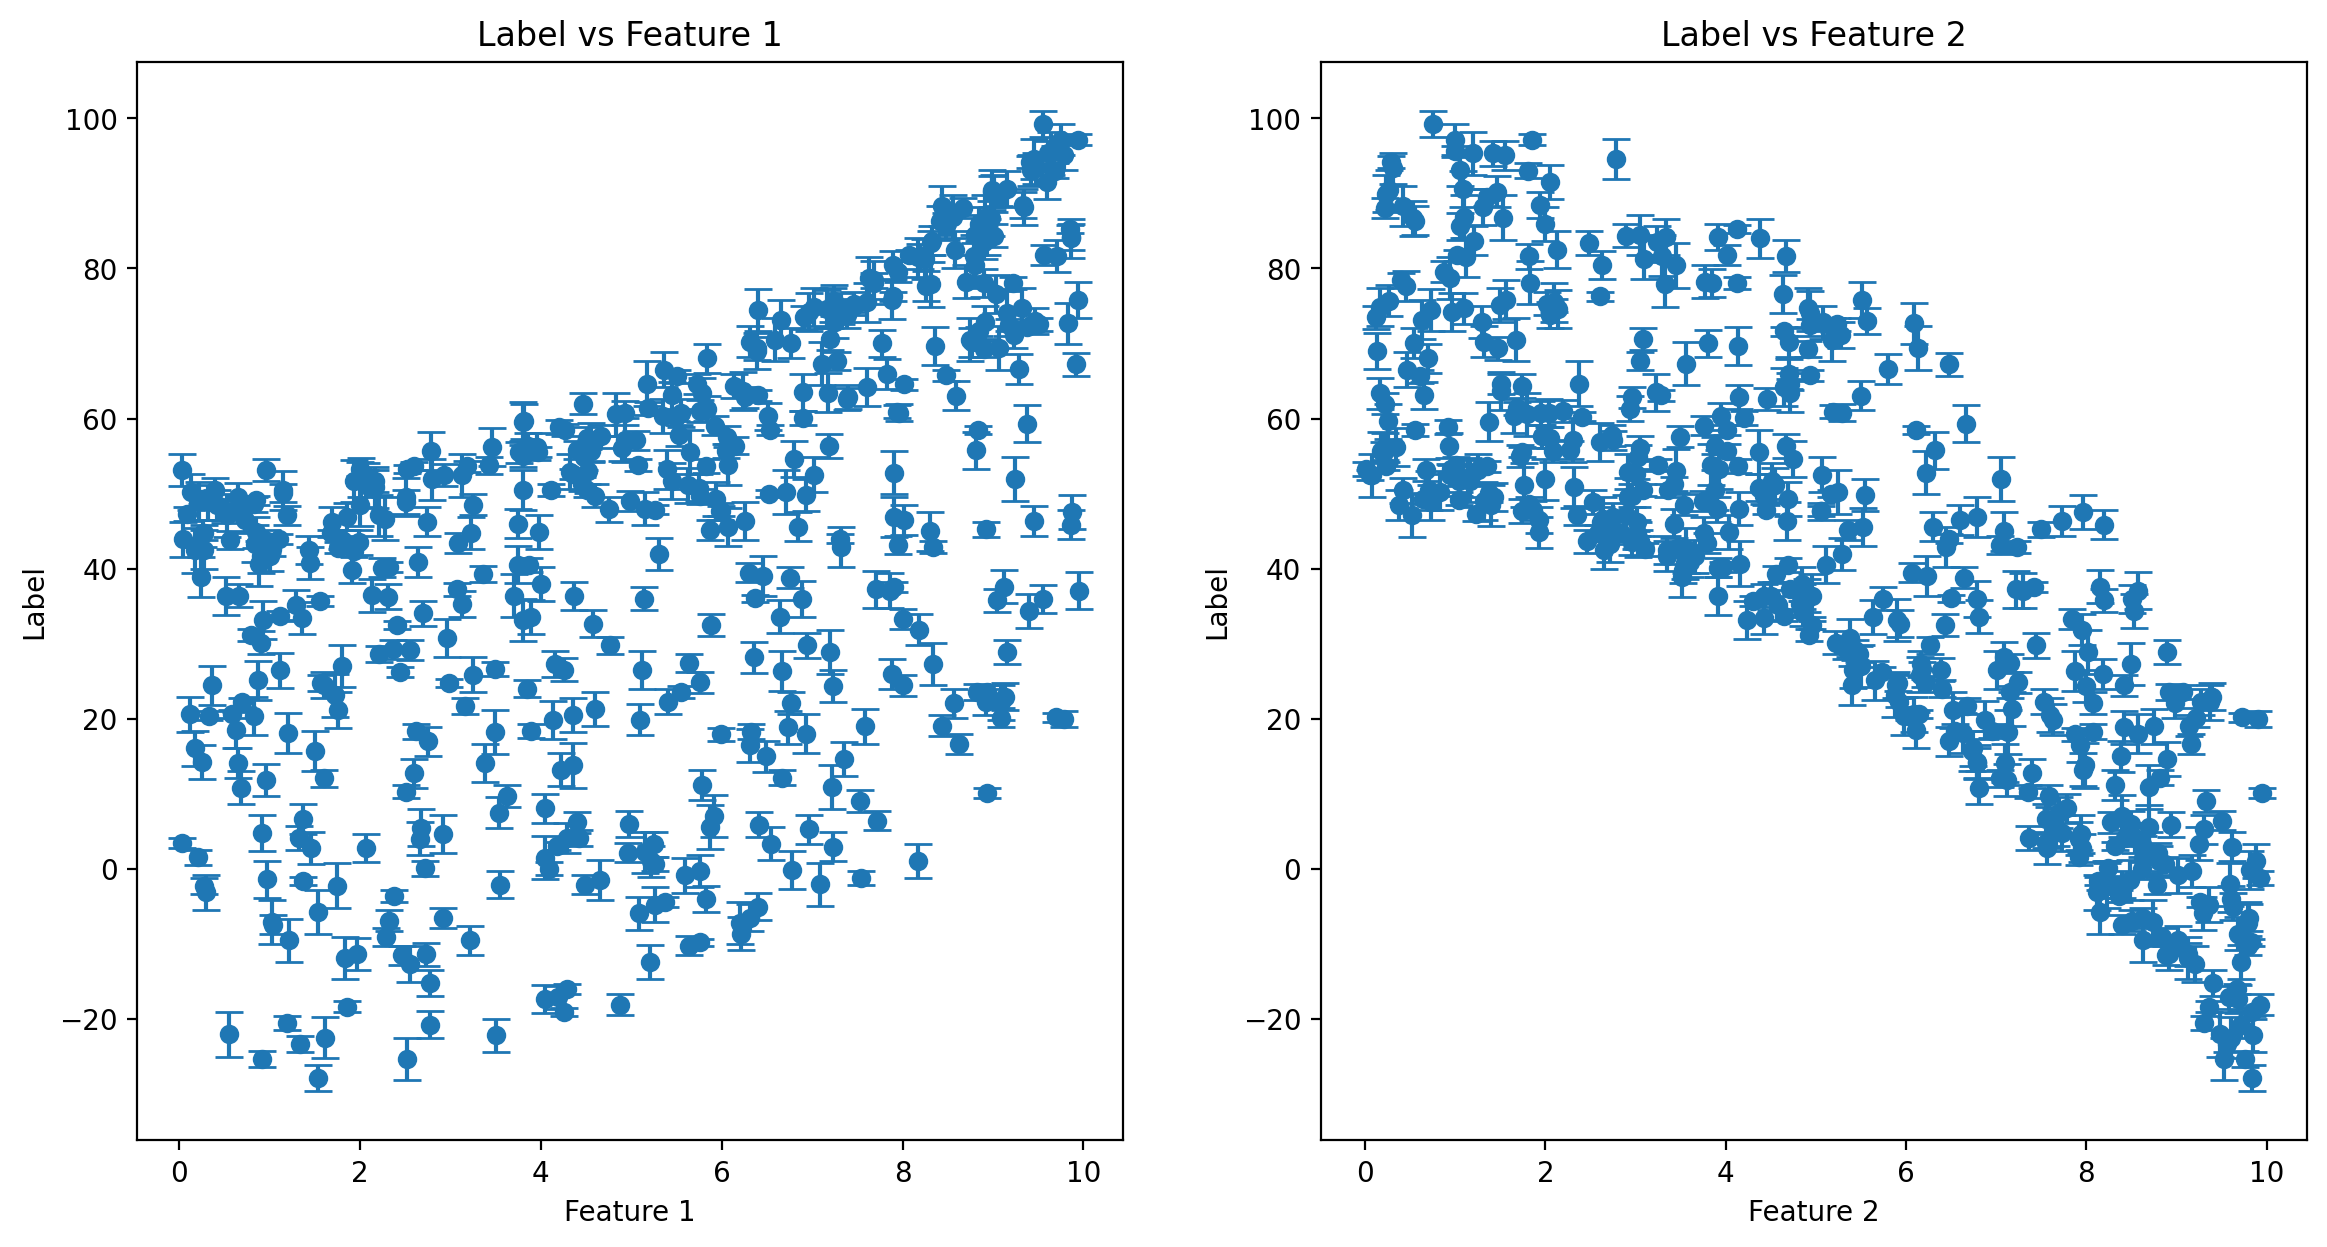

In [3]:
fig, axs = plt.subplots(1,2,figsize=(14,7))

axs[0].errorbar(X[:,0],y, yerr, fmt='o', capsize=5)
axs[0].set_title("Label vs Feature 1")
axs[0].set_xlabel("Feature 1")
axs[0].set_ylabel("Label")

axs[1].errorbar(X[:,1],y, yerr, fmt='o', capsize=5)
axs[1].set_title("Label vs Feature 2")
axs[1].set_xlabel("Feature 2")
axs[1].set_ylabel("Label")

plt.show()

2. Use multivariate linear regression on this data with its uncertainties (`astroML` rather than plain `sklearn` is the better option here). Print the best-fit intercept and slopes for the features. Make a prediction `Xgrid` over $50$ values from the min to the max value of each feature, and plot the best-fit model on a duplicate of the $2$-panel plot from (1); does this look like a good description of the data?

In [57]:
from astroML.linear_model import LinearRegression

In [58]:
model = LinearRegression()
model.fit(X, y, y_error=yerr)
print(model.coef_)

[57.10102323  4.94873016 -8.30023407]


In [59]:
u = np.linspace(min(X[:,0]),max(X[:,0]),50)
v = np.linspace(min(X[:,1]),max(X[:,1]),50)

ypred1 = u * model.coef_[1] + model.coef_[0]
ypred2 = v * model.coef_[2] + model.coef_[0]

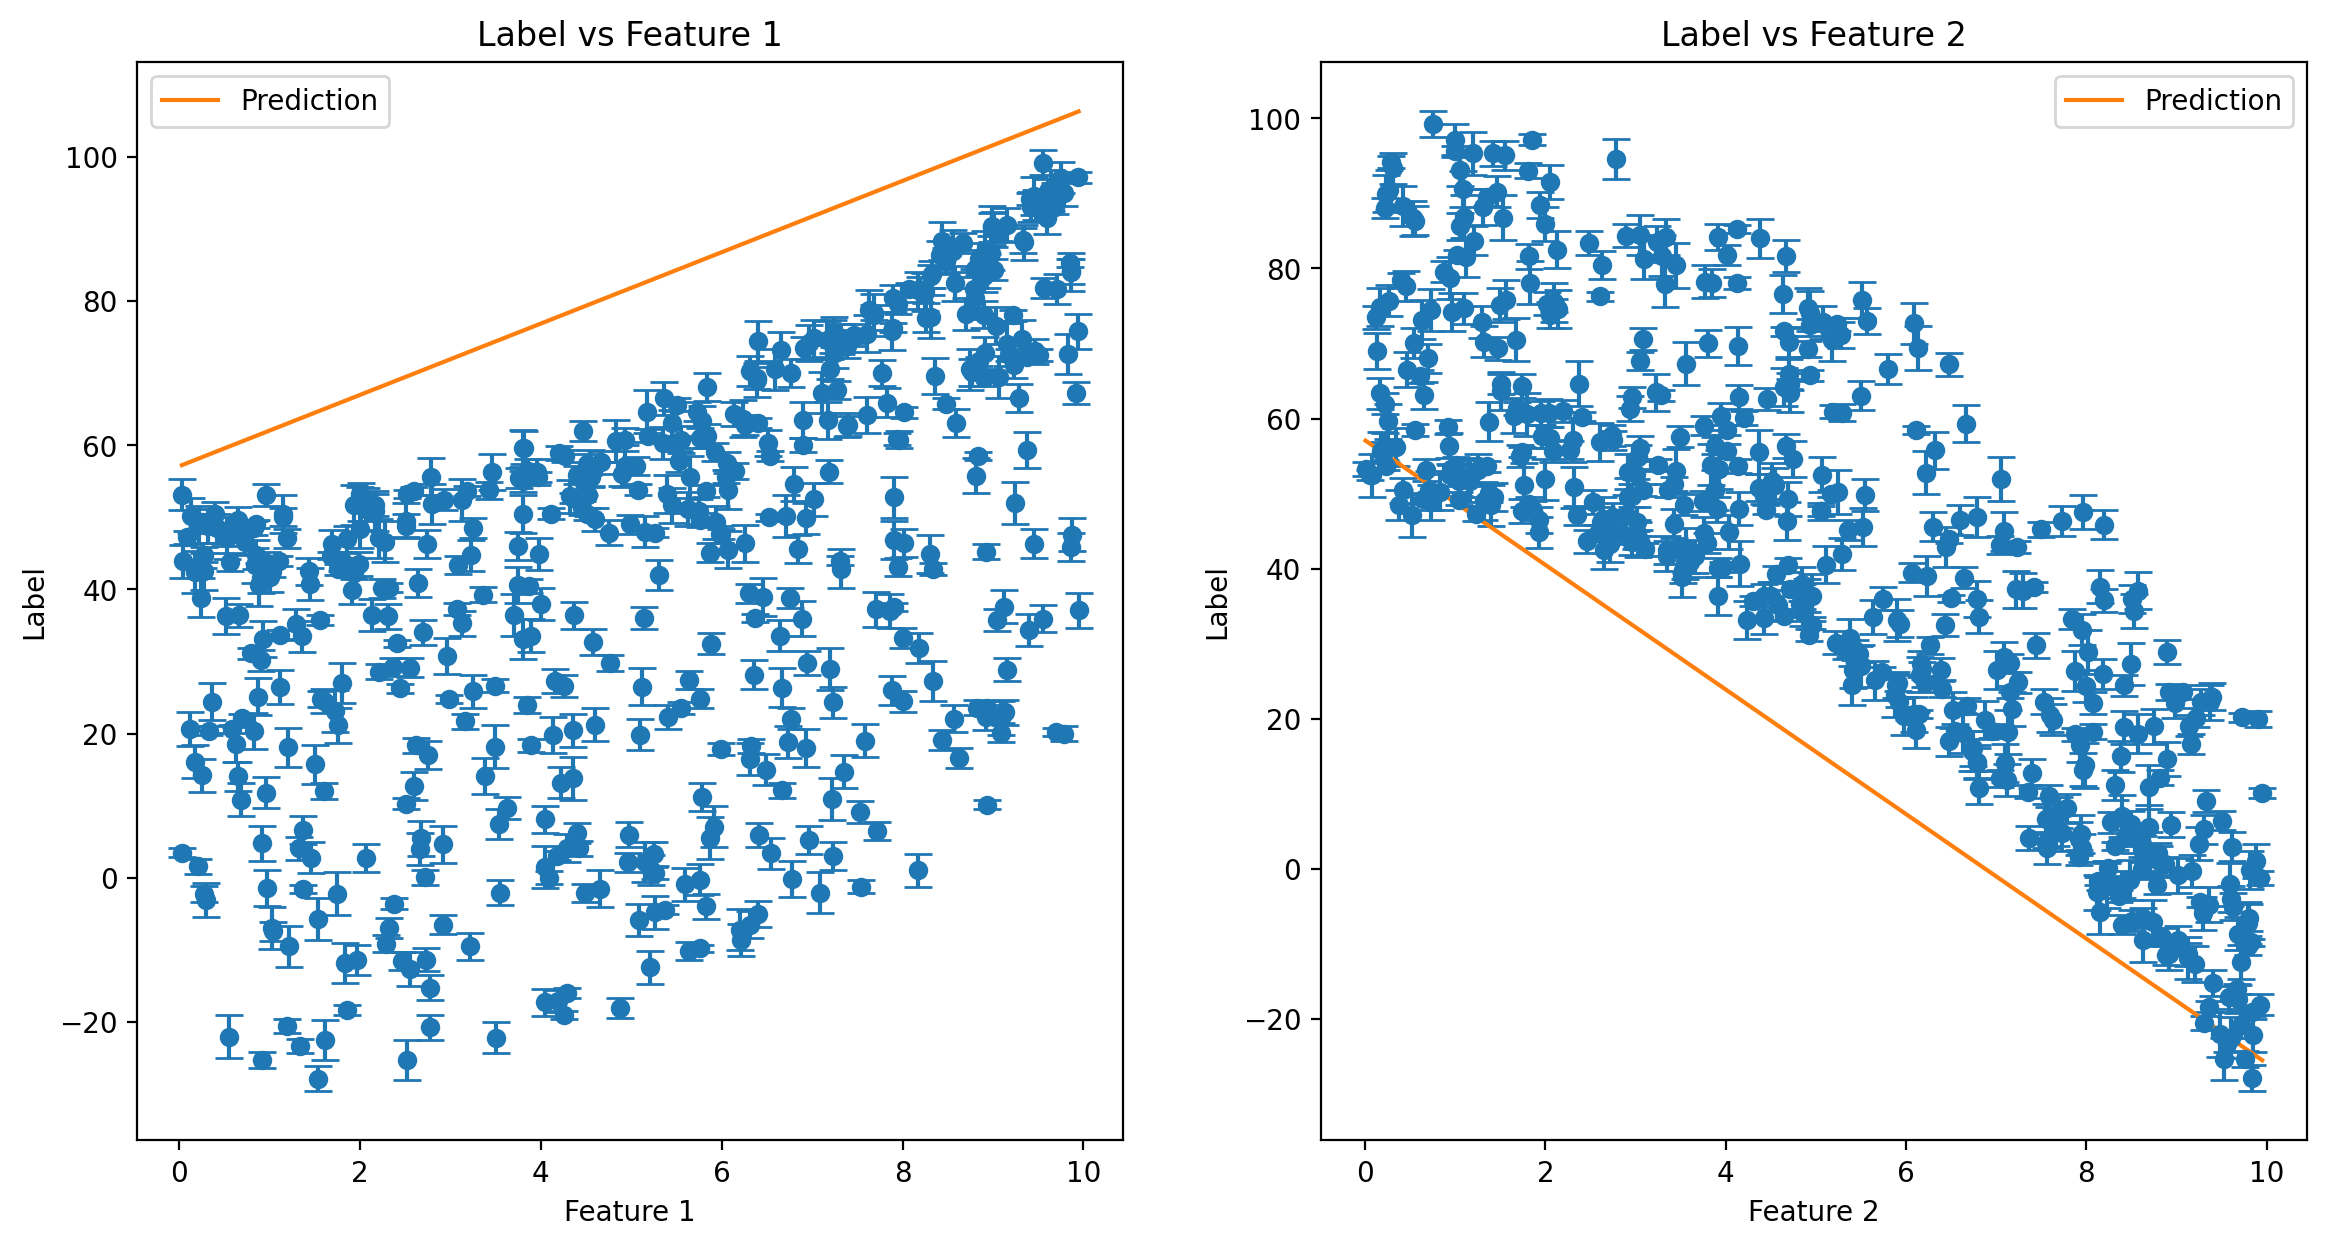

In [62]:
%matplotlib inline
fig, axs = plt.subplots(1,2,figsize=(14,7))

axs[0].errorbar(X[:,0],y, yerr, fmt='o', capsize=5)
axs[0].plot(u,ypred1, label="Prediction")
axs[0].set_title("Label vs Feature 1")
axs[0].set_xlabel("Feature 1")
axs[0].set_ylabel("Label")
axs[0].legend()

axs[1].errorbar(X[:,1],y, yerr, fmt='o', capsize=5)
axs[1].plot(v,ypred2,label="Prediction")
axs[1].set_title("Label vs Feature 2")
axs[1].set_xlabel("Feature 2")
axs[1].set_ylabel("Label")
axs[1].legend()

plt.show()

<font color='blue'> This does not look like a good fit to either individual feature, as the main trend in each feature is completley missed </font>

3. Make a new two-dimensional prediction meshgrid `Xgrid` over the $2$-D feature space, use your best-fit model to predict the labels, and make a $3$-D interactive plot showing the data and your best-fit over the entire space. You may find the following code useful.

In [8]:
u = np.linspace(min(X[:,0]),max(X[:,0]),50)
v = np.linspace(min(X[:,1]),max(X[:,1]),50)
u, v = np.meshgrid(u,v)
Xgrid = np.c_[u.ravel(), v.ravel()]

In [9]:
prediction_Linear = model.predict(Xgrid)

In [10]:
from ipywidgets import interactive

In [11]:
def update_view(angle):
    ax.view_init(elev=28, azim=angle)
    plt.draw()

interactive(children=(IntSlider(value=180, description='angle', max=360, step=5), Output()), _dom_classes=('wi…

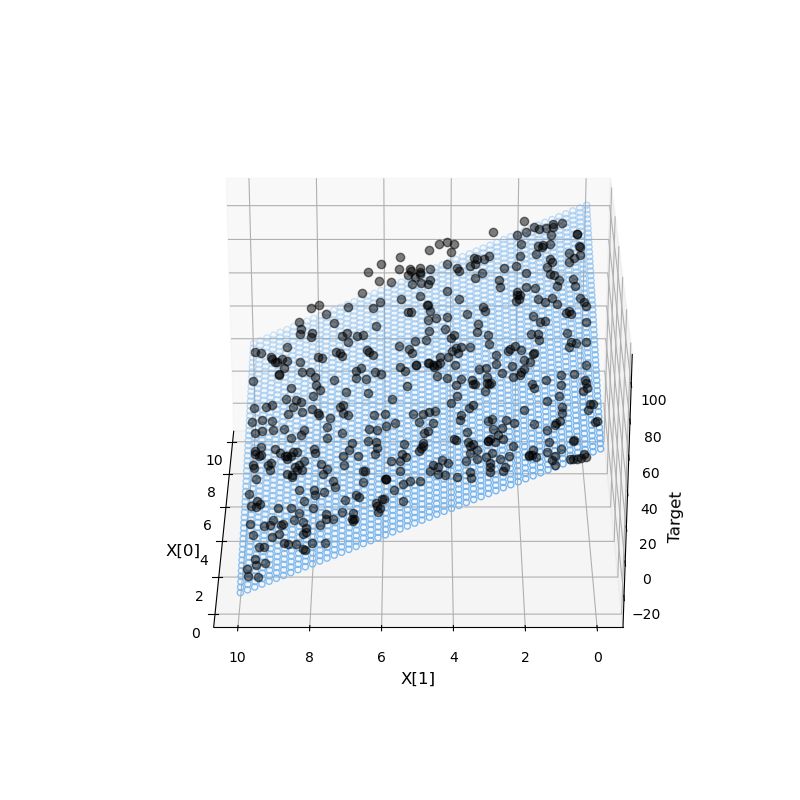

In [12]:
# Makes the plot interactive. 
# You can pan the image.

### always do this line at the start 
### of an interactive plotting cell
%matplotlib widget 
fig = plt.figure(figsize=(8, 8))

ax = fig.add_subplot(111, projection='3d')

ax.plot(X[:,0], X[:,1], y, color='k', 
        zorder=15, linestyle='none', 
        marker='o', alpha=0.5)
ax.scatter(Xgrid[:,0].flatten(), Xgrid[:,1].flatten(), prediction_Linear, 
           facecolor=(0,0,0,0), s=20, 
           edgecolor='#70b3f0')
ax.set_xlabel('X[0]', fontsize=12)
ax.set_ylabel('X[1]', fontsize=12)
ax.set_zlabel('Target', fontsize=12)

ax.view_init(elev=28, azim=120)
interactive_plot = interactive(update_view, angle=(0,360,5))
interactive_plot

In [13]:
### Always do this line at the start
### of a static plotting cell
%matplotlib inline

4. Sticking with a linear model, now attempt a `GridSearchCV` procedure on the data to find the best `Ridge` regression hyper-parameters. Use the following `param_grid`:
```
ridge_params = {'alpha': [0.05,0.1,0.2,0.5,1.0], 'solver': ['svd', 'lsqr']}
```
What are the `best_params_` and the `best_score_` from this? Fit the data with the best options, and visualize interactively. Try `RidgeCV` also; what cross-validated `alpha_` does it return, and does this agree with `GridSeachCV`? *(Hint: remember to revert to inline matplotlib when you're done each time you make an interactive plot.)*

In [14]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge

In [15]:
ridge_params = {'alpha': [0.05,0.1,0.2,0.5,1.0], 'solver': ['svd', 'lsqr']}
grid = GridSearchCV(Ridge(),param_grid=ridge_params)
grid.fit(X,y,sample_weight=1/yerr**2) #Fit the histogram data that we started the lecture with.
print(grid.best_params_)
print(grid.best_score_)

{'alpha': 1.0, 'solver': 'lsqr'}
0.929182742615996


In [16]:
model = Ridge(alpha=1.0,solver="lsqr")
model.fit(X,y,sample_weight=1/yerr**2)
prediction_Ridge = model.predict(Xgrid)

interactive(children=(IntSlider(value=180, description='angle', max=360, step=5), Output()), _dom_classes=('wi…

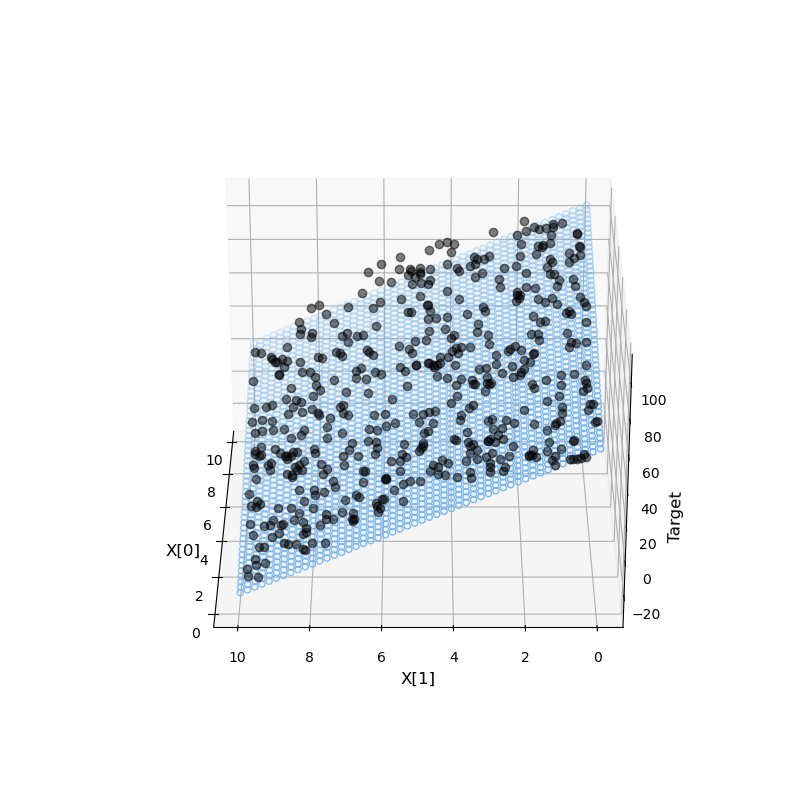

In [17]:
# Makes the plot interactive. 
# You can pan the image.

### always do this line at the start 
### of an interactive plotting cell
%matplotlib widget 
fig = plt.figure(figsize=(8, 8))

ax = fig.add_subplot(111, projection='3d')

ax.plot(X[:,0], X[:,1], y, color='k', 
        zorder=15, linestyle='none', 
        marker='o', alpha=0.5)
ax.scatter(Xgrid[:,0].flatten(), Xgrid[:,1].flatten(), prediction_Ridge, 
           facecolor=(0,0,0,0), s=20, 
           edgecolor='#70b3f0')
ax.set_xlabel('X[0]', fontsize=12)
ax.set_ylabel('X[1]', fontsize=12)
ax.set_zlabel('Target', fontsize=12)

ax.view_init(elev=28, azim=120)
interactive_plot = interactive(update_view, angle=(0,360,5))
interactive_plot

In [18]:
### Always do this line at the start
### of a static plotting cell
%matplotlib inline

In [19]:
from sklearn.linear_model import RidgeCV

In [20]:
model = RidgeCV()
model.fit(X,y,sample_weight=1/yerr**2)
prediction_RidgeCV = model.predict(Xgrid)

interactive(children=(IntSlider(value=180, description='angle', max=360, step=5), Output()), _dom_classes=('wi…

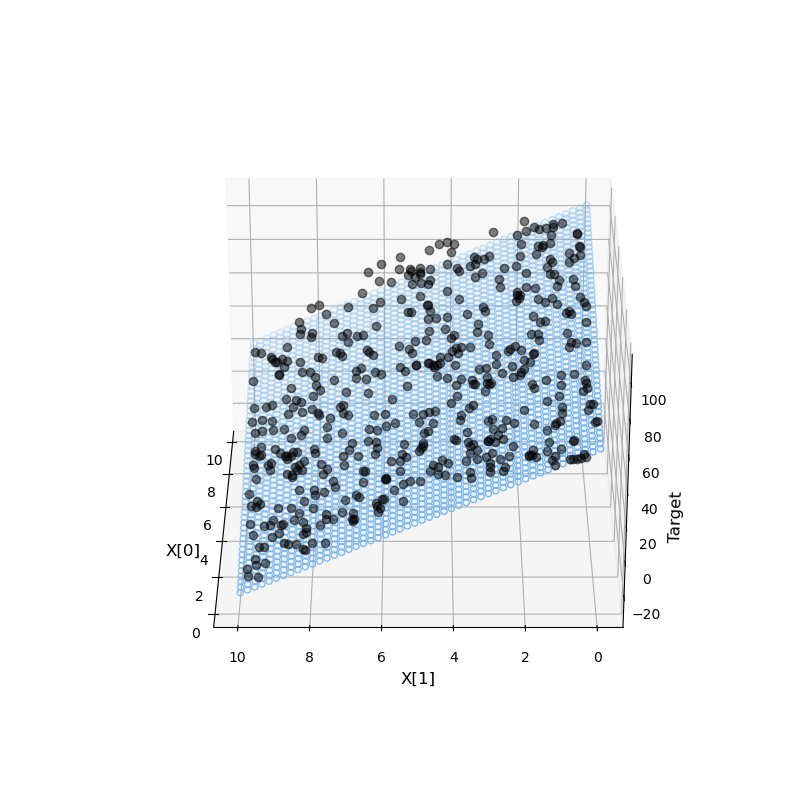

In [21]:
# Makes the plot interactive. 
# You can pan the image.

### always do this line at the start 
### of an interactive plotting cell
%matplotlib widget 
fig = plt.figure(figsize=(8, 8))

ax = fig.add_subplot(111, projection='3d')

ax.plot(X[:,0], X[:,1], y, color='k', 
        zorder=15, linestyle='none', 
        marker='o', alpha=0.5)
ax.scatter(Xgrid[:,0].flatten(), Xgrid[:,1].flatten(), prediction_RidgeCV, 
           facecolor=(0,0,0,0), s=20, 
           edgecolor='#70b3f0')
ax.set_xlabel('X[0]', fontsize=12)
ax.set_ylabel('X[1]', fontsize=12)
ax.set_zlabel('Target', fontsize=12)

ax.view_init(elev=28, azim=120)
interactive_plot = interactive(update_view, angle=(0,360,5))
interactive_plot

In [22]:
### Always do this line at the start
### of a static plotting cell
%matplotlib inline

In [23]:
model.alpha_

1.0

<font color="blue"> This is the same alpha as Ridge, so they agree! </font>

5. Now model the data using Gaussian process regression and the default kernel. Check what the fit looks like with and with and without uncertainties accounted for. *(Hint: GPR in `sklearn` takes an `alpha` parameter equal to `(yerr/y)**2`.)*

In [24]:
from sklearn.gaussian_process import GaussianProcessRegressor

In [25]:
gp = GaussianProcessRegressor()
gp.fit(X,y)
y_pred, dy_pred = gp.predict(Xgrid, return_std=True)

interactive(children=(IntSlider(value=180, description='angle', max=360, step=5), Output()), _dom_classes=('wi…

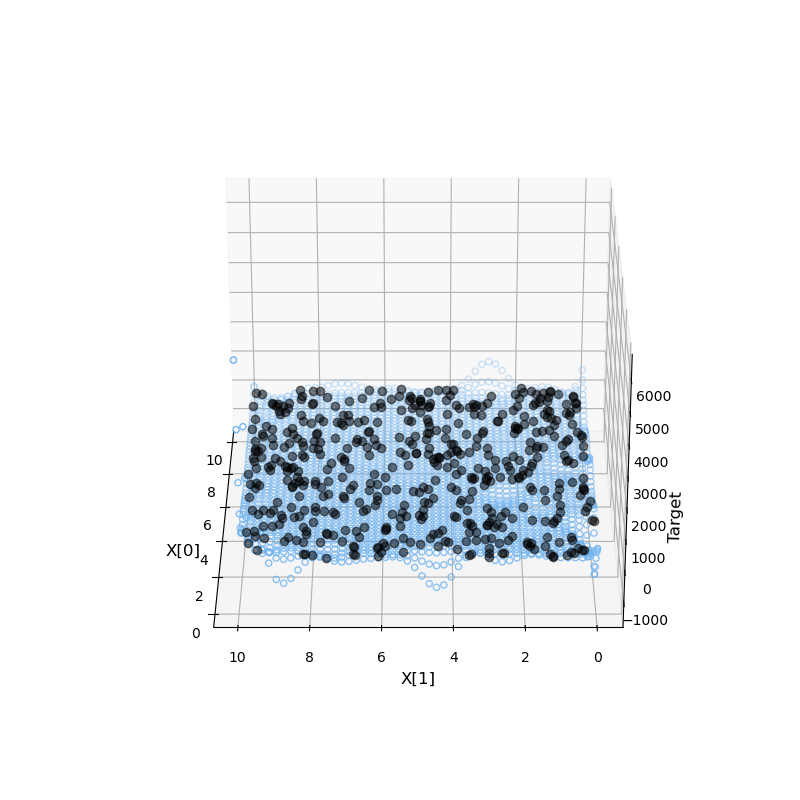

In [26]:
# Makes the plot interactive. 
# You can pan the image.

### always do this line at the start 
### of an interactive plotting cell
%matplotlib widget 
fig = plt.figure(figsize=(8, 8))

ax = fig.add_subplot(111, projection='3d')

ax.plot(X[:,0], X[:,1], y, color='k', 
        zorder=15, linestyle='none', 
        marker='o', alpha=0.5)
ax.scatter(Xgrid[:,0].flatten(), Xgrid[:,1].flatten(), y_pred, 
           facecolor=(0,0,0,0), s=20, 
           edgecolor='#70b3f0')
ax.set_xlabel('X[0]', fontsize=12)
ax.set_ylabel('X[1]', fontsize=12)
ax.set_zlabel('Target', fontsize=12)

ax.view_init(elev=28, azim=120)
interactive_plot = interactive(update_view, angle=(0,360,5))
interactive_plot

In [27]:
### Always do this line at the start
### of a static plotting cell
%matplotlib inline

In [28]:
gp = GaussianProcessRegressor(alpha=(yerr/y)**2)
gp.fit(X,y)
y_pred, dy_pred = gp.predict(Xgrid, return_std=True)

interactive(children=(IntSlider(value=180, description='angle', max=360, step=5), Output()), _dom_classes=('wi…

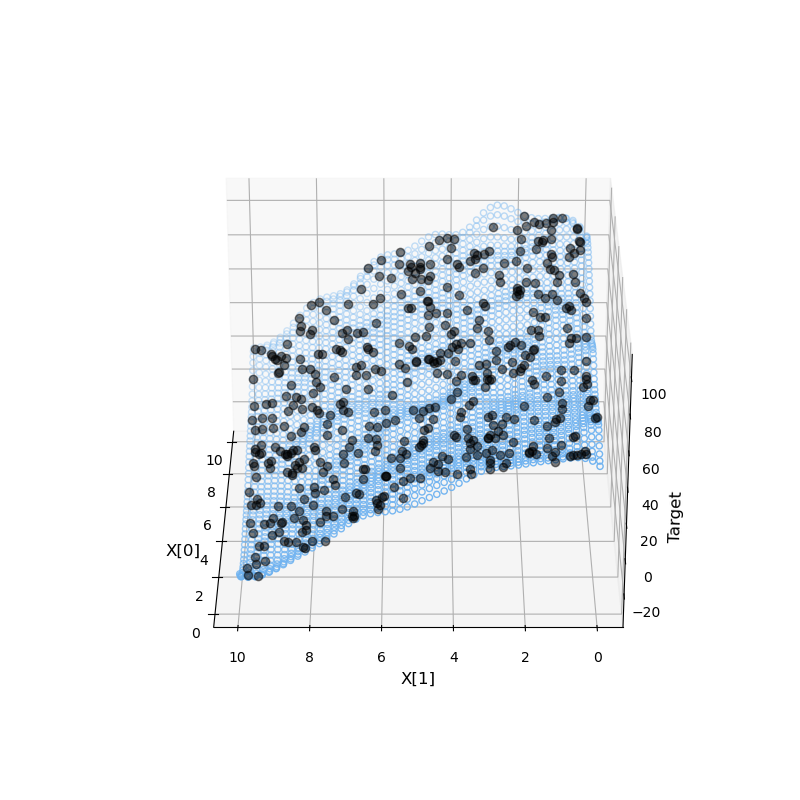

In [29]:
# Makes the plot interactive. 
# You can pan the image.

### always do this line at the start 
### of an interactive plotting cell
%matplotlib widget 
fig = plt.figure(figsize=(8, 8))

ax = fig.add_subplot(111, projection='3d')

ax.plot(X[:,0], X[:,1], y, color='k', 
        zorder=15, linestyle='none', 
        marker='o', alpha=0.5)
ax.scatter(Xgrid[:,0].flatten(), Xgrid[:,1].flatten(), y_pred, 
           facecolor=(0,0,0,0), s=20, 
           edgecolor='#70b3f0')
ax.set_xlabel('X[0]', fontsize=12)
ax.set_ylabel('X[1]', fontsize=12)
ax.set_zlabel('Target', fontsize=12)

ax.view_init(elev=28, azim=120)
interactive_plot = interactive(update_view, angle=(0,360,5))
interactive_plot

In [30]:
### Always do this line at the start
### of a static plotting cell
%matplotlib inline

<font color="blue"> Without the uncertainties the model appears to not agree with the linear regressions and appears to be very flat. However, with the error accounted for it appears as a mesh that is finey tuned to the individual points and uncertainties. The sort of rocky terrain it creates is emblematic of the fact that the GP regression is highly tuned only around where there is data. </font>

6. Let's look finally at polynomial fitting. Fit a $4$th degree polynomial to the data. Print the best-fit regression coefficients, predict on the 2D meshgrid, and visualize interactively as before. How does this look compared to the linear model and GPR models?

In [31]:
from astroML.linear_model import PolynomialRegression

In [32]:
degree = 4
model = PolynomialRegression(degree)
model.fit(X,y,yerr)

y_pred_poly4 = model.predict(Xgrid)
print(model.coef_)

[ 4.99887582e+01  5.54313398e-01 -2.07866484e-01  2.86536907e-01
  2.93842379e-03 -7.82230112e-01  2.47603263e-02  2.45748271e-02
 -2.22233559e-02  9.68417971e-03 -9.95958746e-04 -1.12284370e-03
 -1.14462222e-03  2.10142159e-03 -1.08539159e-03]


interactive(children=(IntSlider(value=180, description='angle', max=360, step=5), Output()), _dom_classes=('wi…

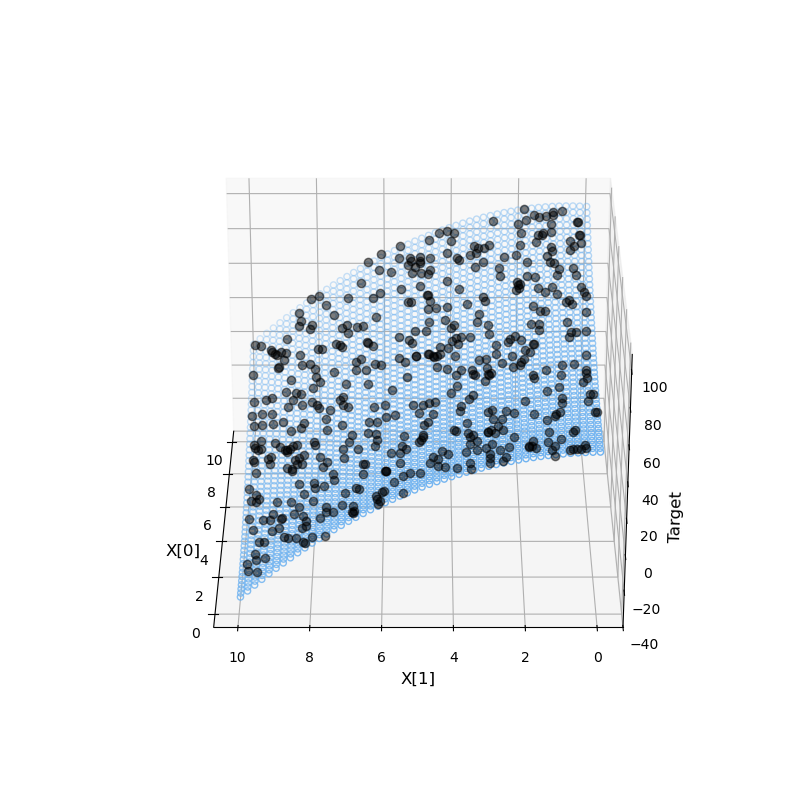

In [33]:
# Makes the plot interactive. 
# You can pan the image.

### always do this line at the start 
### of an interactive plotting cell
%matplotlib widget 
fig = plt.figure(figsize=(8, 8))

ax = fig.add_subplot(111, projection='3d')

ax.plot(X[:,0], X[:,1], y, color='k', 
        zorder=15, linestyle='none', 
        marker='o', alpha=0.5)
ax.scatter(Xgrid[:,0].flatten(), Xgrid[:,1].flatten(), y_pred_poly4, 
           facecolor=(0,0,0,0), s=20, 
           edgecolor='#70b3f0')
ax.set_xlabel('X[0]', fontsize=12)
ax.set_ylabel('X[1]', fontsize=12)
ax.set_zlabel('Target', fontsize=12)

ax.view_init(elev=28, azim=120)
interactive_plot = interactive(update_view, angle=(0,360,5))
interactive_plot

In [34]:
### Always do this line at the start
### of a static plotting cell
%matplotlib inline

<font color="blue"> This looks very different fron the linear models as it uses a curve to incorperate the Low Feature 1 High Feature 2 points, similar to the GP. However, this is much smoother than the GP and it almost seems to overfit the data? </font>

7. Sticking with polynomial fitting, let's find the optimal hyper-parameters through cross-validation. 
- Using `sklearn.model_selection.train_test_split`, first do a train-test split with a `test_size` of $20\%$. Then split out $20\%$ of the training set itself as a cross-validation set (leaving a somewhat smaller set to use for training). Note that you'll need to simultaneously split out `yerr` as well by just providing this as another array to `train_test_split`.
- Compute the training and cross-validation rms errors (and from those, the BIC values) as a function of polynomial degree from $1$ to $10$ inclusive. Plot the rms errors and BIC values as a function of the polynomial degree. 
- Choose the optimal polynomial degree, and train on all training data from the first `train_test_split` operation. Predict the labels of the held-out test set, and finally compute the testing rms error.

In [35]:
from sklearn.model_selection import train_test_split

In [36]:
Xtrain_first, Xtest_first, ytrain_first, ytest_first, yerrtrain_first, yerrtest_first = train_test_split(X,y,yerr,test_size=0.2, train_size=0.8)

In [37]:
print(X.shape)
print(Xtest_first.shape,Xtrain_first.shape)

(500, 2)
(100, 2) (400, 2)


In [38]:
Xtrain, Xcross, ytrain, ycross, yerrtrain, yerrcross = train_test_split(Xtrain_first,ytrain_first,yerrtrain_first,test_size=0.2, train_size=0.8)

In [39]:
print(X.shape)
print(Xtest_first.shape,Xtrain.shape,Xcross.shape)

(500, 2)
(100, 2) (320, 2) (80, 2)


<font color="blue"> Distribution looks good </font>

In [40]:
d = np.arange(0, 11)
training_err = np.zeros(d.shape)
crossval_err = np.zeros(d.shape)

for i in range(len(d)):
    model = PolynomialRegression(d[i])
    model.fit(Xtrain,ytrain,yerrtrain)
    training_err[i] = np.sqrt(np.sum((model.predict(Xtrain) - ytrain) ** 2/yerrtrain)
                              / len(ytrain))
    crossval_err[i] = np.sqrt(np.sum((model.predict(Xcross) - ycross) ** 2/yerrcross)
                              / len(ycross))

BIC_train = np.sqrt(len(ytrain)) * training_err + d * np.log(len(ytrain))
BIC_crossval = np.sqrt(len(ycross)) * crossval_err + d * np.log(len(ycross))

<font color="blue"> Changed above to include the yerrs in the np.sum above </font>

In [41]:
%matplotlib inline

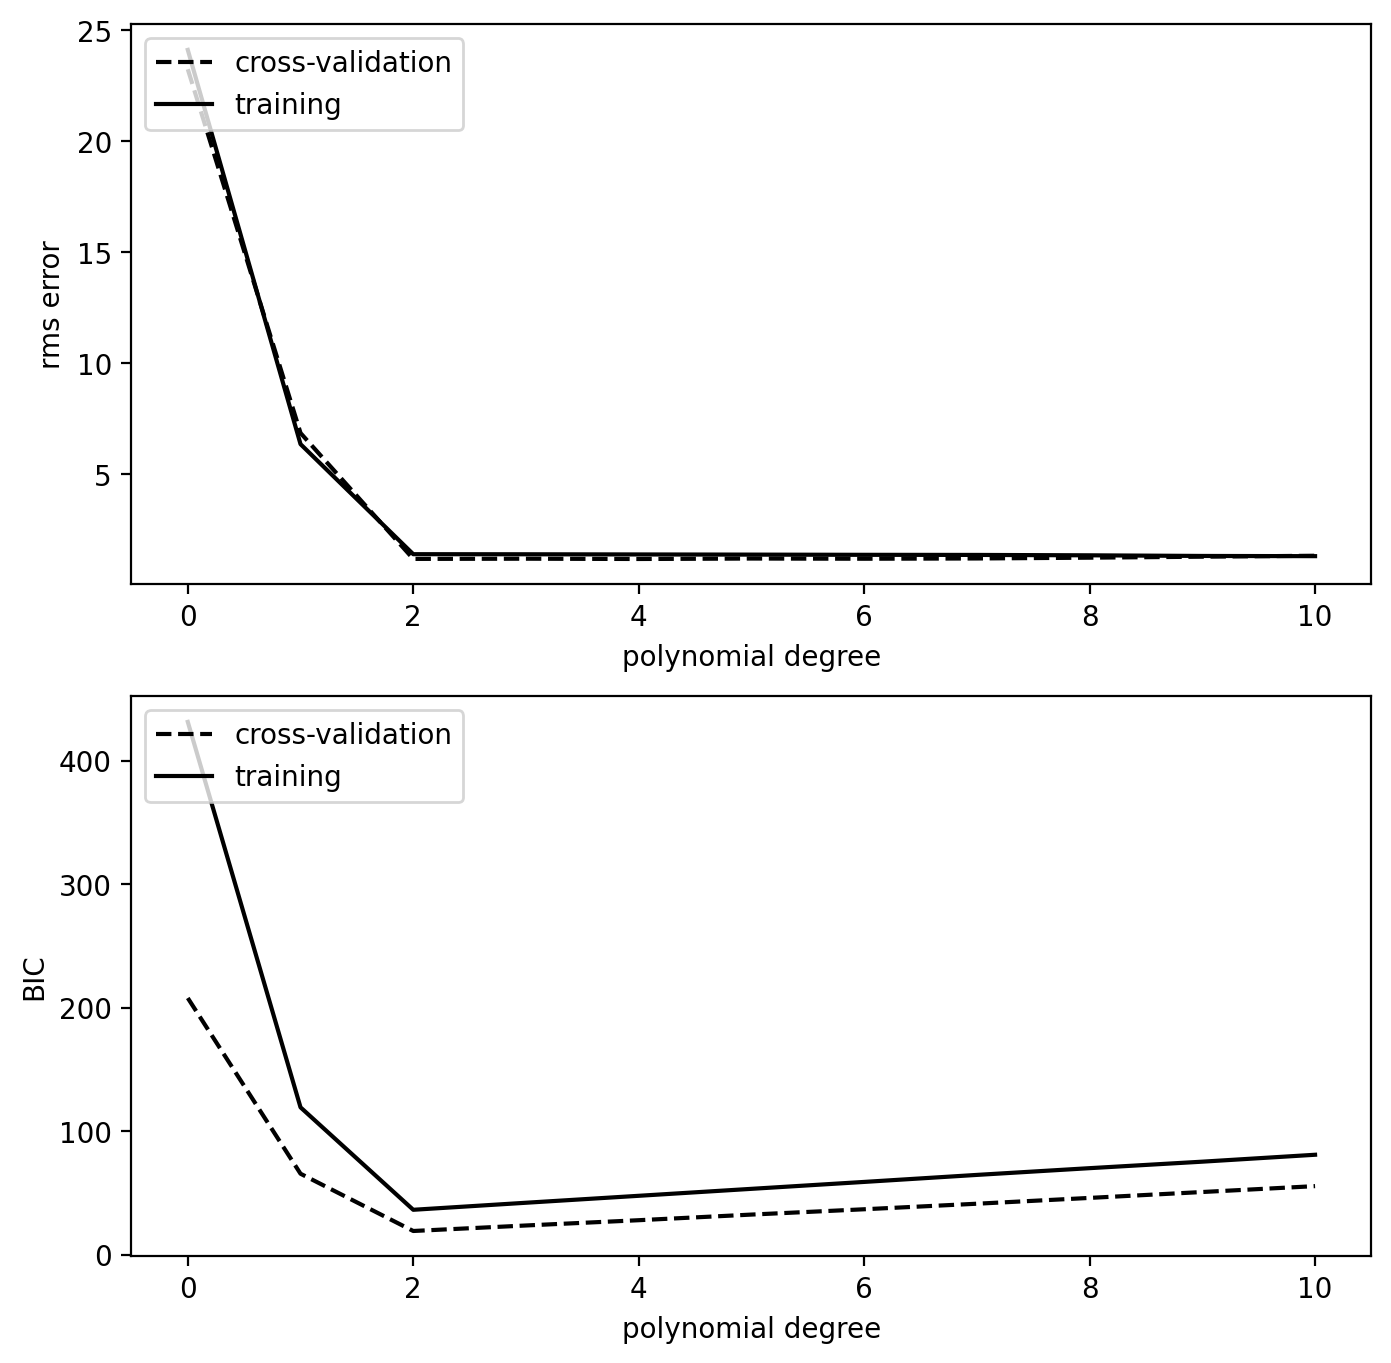

In [43]:
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(211)
ax.plot(d, crossval_err, '--k', label='cross-validation')
ax.plot(d, training_err, '-k', label='training')

ax.set_xlabel('polynomial degree')
ax.set_ylabel('rms error')
ax.legend(loc=2)

ax = fig.add_subplot(212)
ax.plot(d, BIC_crossval, '--k', label='cross-validation')
ax.plot(d, BIC_train, '-k', label='training')

ax.legend(loc=2)
ax.set_xlabel('polynomial degree')
ax.set_ylabel('BIC')

plt.show()

<font color="blue"> According to RMS error it tapers off greatly after 2 degrees. However, the BIC bottoms out at 2 degrees and begins increasing again after there. Therefore, a 2 degree polynomial seems to be the best to fit to the data. </font>

In [46]:
model = PolynomialRegression(2)
model.fit(Xtrain_first,ytrain_first,yerrtrain_first)
y_pred_poly2 = model.predict(Xtest_first)

In [47]:
err_poly2 = np.sqrt(np.sum((y_pred_poly2 - ytest_first) ** 2/yerrtest_first)/ len(ytest_first))
print("RMS error is", err_poly2)

RMS error is 1.1848006293469167


<font color="blue"> Added in the yerrtest_first to the denominator here after emailing becuase it is the same as the rms from above </font>